# 序列模型


序列数据
- 实际中很多数据是有时序结构的
- 电影的评价随时间变化而变化
  - 拿奖后评分上升，直到奖项被忘记
  - 看了很多好电影后，期望变高
  - 季节性：贺岁片、暑期档
  - 导演、演员的负面报道导致评分变低

更多例子
- 音乐、语言、文本和视频都是连续的
  - 标题‘狗咬人’远没有‘人咬狗’那么令人惊讶
- 大地震发生后，很可能会有几次较小的余震
- 人的互动是连续的，从网上吵架可以看出
- 预测明天的股价要比填补昨天遗失的股价的更困难

统计工具
- 在时间$t$观察到$x_t$，那么得到$T$个不独立的随机变量$(x_1, x_2, \dots, x_T) \sim p(\mathbf{x})$
- 使用条件概率展开
$$p(a,b)=p(a)p(b|a)=p(b)p(a|b)$$
- $$p(\mathbf{x}) = p(x_1) \cdot p(x_2 \mid x_1) \cdot p(x_3 \mid x_1, x_2) \cdot \ldots \cdot p(x_T \mid x_1, \ldots, x_{T-1})$$
- $$p(\mathbf{x}) = p(x_T) \cdot p(x_{T-1} \mid x_T) \cdot p(x_{T-2} \mid x_{T-1}, x_T) \cdot \ldots \cdot p(x_1 \mid x_2, \ldots, x_T)$$
  - 物理上不一定可行

序列模型
- $$p(\mathbf{x}) = p(x_1) \cdot p(x_2 \mid x_1) \cdot p(x_3 \mid x_1, x_2) \cdot \ldots \cdot p(x_T \mid x_1, \ldots, x_{T-1})$$
- 对条件概率建模
$$p(x_t|x_1, \dots,x_{t-1})=p(x_t|f(x_1, \dots, x_{t-1}))$$
  - 对见过的数据建模，也称**自回归模型**

方案A-马尔科夫假设
$$p(\mathbf{x}) = p(x_1) \cdot p(x_2 \mid x_1) \cdot p(x_3 \mid x_1, x_2) \cdot \ldots \cdot p(x_T \mid x_1, \ldots, x_{T-1})$$
- 假设当前数据**只和$\tau$个**过去数据点相关
$$p(x_t|x_1, \dots,x_{t-1})=p(x_t|x_{t-\tau}, \dots,x_{t-1})=p(x_t|f(x_{t-\tau}, \dots, x_{t-1}))$$
  - 例如在过去数据上训练一个MLP模型

方案B-潜（隐）变量模型
$$p(\mathbf{x}) = p(x_1) \cdot p(x_2 \mid x_1) \cdot p(x_3 \mid x_1, x_2) \cdot \ldots \cdot p(x_T \mid x_1, \ldots, x_{T-1})$$
- 引入潜变量$h_t$来表示过去信息$h_t=f(x_1, \dots, x_{t-1})$
  - 这样$x_t=p(x_t|h_t)$
  - $h_t$从未被观测到，故模型也被称为隐变量自回归模型
- 实际上分解为两个模型：
  - 根据前一个潜变量$h_{t-1}$和$x_{t-1}$来推测$h_t$，$h_t=g(h_{t-1},x_{t-1})$
  - 根据$h_t$和$x_{t-1}$来推测$x_t$，即基于$\hat{x}_t=p(x_t \mid h_t)$估计$x_t$
  - （实际这里讲的是没有$x_{t-1}$的事情的）


总结
- 时序模型中，当前数据跟之前观察到的数据相关
- 自回归模型使用自身过去数据来预测未来
- 马尔科夫模型假设当前只跟最近少数数据相关，从而简化模型
- 潜变量模型使用潜变量来概括历史信息




## 代码

### 训练

In [1]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 126.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Succes

In [ ]:
import torch

from torch import nn
from d2l import torch as d2l

生成一些数据：**使用正弦函数和一些可加性噪声来生成序列数据，时间步为1, 2, ..., 1000**

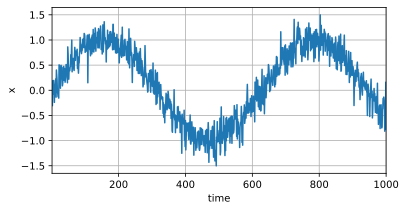

In [ ]:
T = 1000
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))  # 加上噪音
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

将序列转换为模型的**特征-标签（feature-label）对**
- 基于嵌入维度$\tau$，将数据映射为**数据对$y_t=x_t$和$\mathbf{x_t}=[x_{t-\tau}, \dots, x_{t-1}]$**
- 注意，会比提供的数据样本少$\tau$个
  - 如果有足够长的序列就丢弃这几项
  - 或者用0填充序列

通过马尔科夫条件，将问题转换为熟悉的**回归问题**
- 这里只使用前600个‘特征-标签’对进行训练

In [ ]:
def load_array(data_arrays, batch_size, is_train=True):
  dataset = torch.utils.data.TensorDataset(*data_arrays)
  return torch.utils.data.DataLoader(dataset, batch_size, shuffle=is_train)

In [ ]:
tau = 4
features = torch.zeros((T - tau, tau))  # (样本数， 特征数)
for i in range(tau):
  features[:, i] = x[i: T - tau + i]
labels = x[tau:].reshape(-1, 1)

batch_size, n_train = 16, 600
train_ter = d2l.load_array((features[:n_train], labels[:n_train]), batch_size, is_train=True)

**使用相当简单的架构训练模型：一个拥有两个全连接层的多层感知机**

In [ ]:
def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.xavier_uniform_(m.weight)

def get_net():
  net = nn.Sequential(nn.Linear(4, 10), nn.ReLU(), nn.Linear(10, 1))
  net.apply(init_weights)
  return net

# 平方损失
loss = nn.MSELoss(reduction='none')

**训练模型**

In [ ]:
def train(net, train_iter, loss, num_epochs, lr):
  trainer = torch.optim.Adam(net.parameters(), lr=lr)
  for epoch in range(num_epochs):
    for X, y in train_iter:
      trainer.zero_grad()
      l = loss(net(X), y)
      l.sum().backward()
      trainer.step()
    print(f'epoch:{epoch},loss:{d2l.evaluate_loss(net, train_ter, loss):f}')

net = get_net()
num_epochs, lr = 5, 0.01
train(net, train_ter, loss, num_epochs, lr)

epoch:0,loss:0.069857
epoch:1,loss:0.051788
epoch:2,loss:0.050848
epoch:3,loss:0.048750
epoch:4,loss:0.046833


### 预测

**模型预测下一个时间步**，单步预测

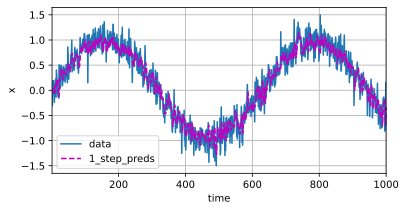

In [ ]:
oneset_preds = net(features)
d2l.plot(
  [time, time[tau:]],
  [x.detach().numpy(), oneset_preds.detach().numpy()], 'time', 'x',
  legend=['data', '1_step_preds'], xlim=[1, 1000], figsize=(6, 3)
)

- 看出即使这些预测的时间步超过了`600 + 4(n_trian + tau)`，结果看起来仍然可信
- 问题：如果数据观察序列时间步只到604， 需要一步一步向前迈进
$$\hat{x}_{605} = f(x_{601}, x_{602}, x_{603}, x_{604}), \\
\hat{x}_{606} = f(x_{602}, x_{603}, x_{604}, \hat{x}_{605}), \\
\hat{x}_{607} = f(x_{603}, x_{604}, \hat{x}_{605}, \hat{x}_{606}),\\
\hat{x}_{608} = f(x_{604}, \hat{x}_{605}, \hat{x}_{606}, \hat{x}_{607}),\\
\hat{x}_{609} = f(\hat{x}_{605}, \hat{x}_{606}, \hat{x}_{607}, \hat{x}_{608}),\\
\ldots$$

- 通常，对于知道$x_t$的观测序列，其在时间步$t+k$处的预测输出$\hat{x}_{t+k}$称为$k$步预测
  - 由于观察已经到了$x_{604}$，它的$k$步预测是$\hat{x}_{604+k}$
- 必须使用我们自己的预测（而不是原始数据）来[**进行多步预测**]


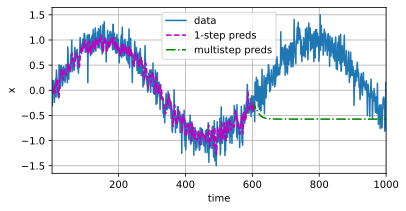

In [ ]:
multistep_preds = torch.zeros(T)
multistep_preds[: n_train + tau] = x[: n_train + tau]
for i in range(n_train + tau, T):
  multistep_preds[i] = net(multistep_preds[i - tau: i].reshape(1, -1))

d2l.plot(
  [time, time[tau: n_train + tau], time[n_train + tau:]],
  [x.detach().numpy(), oneset_preds[:n_train].detach().numpy() ,multistep_preds[n_train + tau:].detach().numpy()],
  'time', 'x', legend=['data', '1-step preds', 'multistep preds'],
  xlim=[1, 1000], figsize=(6, 3)
)

绿色的预测不理想，经过几个预测步骤后，预测的结果很快会衰减到一个常数
- 原因：错误的**积累**

基于$k=1, 4, 16, 64$，通过对整个序列预测的计算，看到**第$k$步预测**的困难
- 就是要看多步预测的**第k步的预测准确性**

- `features`的前$\tau$列是历史观测，后`max_steps`列是多步预测的结果
- `steps`是表示step步预测：用当前的观测数据**预测接下的step个时间点**
- **挺难理解的，多看几遍**


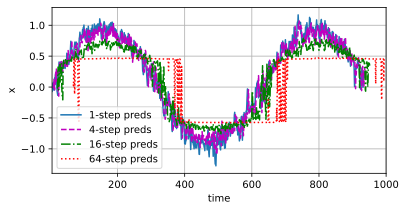

In [ ]:
max_steps = 64

# 列数：前\tau列是历史观测，后max_steps列是多步预测的结果
features = torch.zeros((T - tau - max_steps + 1, tau + max_steps))

# 列i（i<tau）是来自x的观测，其时间步从（i）到（i+T-tau-max_steps+1）
for i in range(tau):
  features[:, i] = x[i: i + T - tau - max_steps + 1]

# 列i（i>=tau）是来自（i-tau+1）步的预测，其时间步从（i）到（i+T-tau-max_steps+1）
for i in range(tau, tau + max_steps):
  features[:, i] = net(features[:, i - tau: i]).reshape(-1)

steps = (1, 4, 16, 64)  # 指定不同的预测步数
d2l.plot(
  [time[tau + i - 1: T - max_steps + i] for i in steps],  # 对应i-步预测的时间范围
  [features[:, (tau + i - 1)].detach().numpy() for i in steps],  # 对应第i-步预测的结果
  'time', 'x', legend=[f'{i}-step preds' for i in steps],
  xlim=[5, 1000],  figsize=(6, 3)
)

### 小结

* **内插法**（在现有观测值之间进行估计）和**外推法**（对超出已知观测范围进行预测）在实践的难度上差别很大。因此，对于所拥有的序列数据，在训练时始终要**尊重其时间顺序**，即最好不要基于未来的数据进行训练。
* 序列模型的估计需要专门的统计工具，两种较流行的选择是**自回归模型**和**隐变量自回归模型**。
* 对于时间是向前推进的因果模型，正向估计通常比反向估计更容易。
* 对于直到时间步$t$的观测序列，其在时间步$t+k$的预测输出是“$k$步预测”。随着我们对预测时间$k$值的增加，会造成**误差的快速累积**和**预测质量的极速下降**。

## 练习

#### 1
1. 改进本节实验中的模型。
    - 是否包含了过去4个以上的观测结果？真实值需要是多少个？
    - 如果没有噪音，需要多少个过去的观测结果？提示：把sin和cos写成微分方程
    - 可以在保持特征总数不变的情况下合并旧的观察结果吗？是否能提高正确度
    - 改变神经网络架构并评估其性能

- 答
  - 增加多层感知机中隐藏层的大小和层数，可以发现loss相较于初始的多层感知机出现降低
  - 复杂结构在某种程度上提升了模型性能
  - 复杂结构的loss在第2个epoch出现增高，导致曲线振荡

In [1]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfull

In [2]:
import torch
import matplotlib.pyplot as plt

from torch import nn
from d2l import torch as d2l

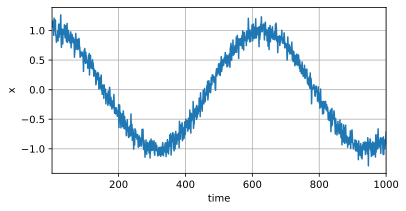

In [3]:
T = 1000
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.cos(0.01 * time) + torch.normal(0, 0.1, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [4]:
def load_array(data_arrays, batch_size, is_train=True):
  dataset = torch.utils.data.TensorDataset(*data_arrays)
  return torch.utils.data.DataLoader(dataset, batch_size, shuffle=is_train)

In [5]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
  features[:, i] = x[i : T - tau + i]
labels = x[tau:].reshape(-1, 1)

batch_size, n_train = 16, 600

# 只有前n_train个样本用于训练
train_iter = load_array((features[:n_train], labels[:n_train]), batch_size, is_train=True)

In [6]:
# 初始化网络权重的函数
def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.xavier_uniform_(m.weight)

# 一个简单的多层感知机
def get_net():
  net = nn.Sequential(
    nn.Linear(tau, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
  )
  net.apply(init_weights)
  return net

loss = nn.MSELoss(reduction='none')

def train(net, train_iter, loss, num_epochs, lr):
  trainer = torch.optim.Adam(net.parameters(), lr=lr)
  for epoch in range(num_epochs):
    for X, y in train_iter:
      trainer.zero_grad()
      l = loss(net(X), y)
      l.sum().backward()
      trainer.step()
    print(f'epoch:{epoch + 1}, loss:{d2l.evaluate_loss(net, train_iter, loss):.5f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch:1, loss:0.02016
epoch:2, loss:0.01429
epoch:3, loss:0.01338
epoch:4, loss:0.01331
epoch:5, loss:0.01453


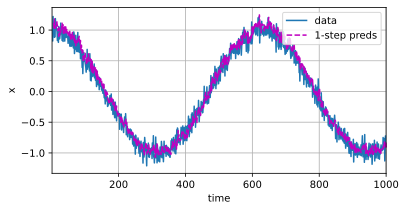

In [7]:
# 预测

oneset_preds = net(features)
d2l.plot(
  [time, time[tau:]],
  [x.detach().numpy(), oneset_preds.detach().numpy()], 'time',
  'x', legend=['data', '1-step preds'], xlim=[1, 1000],
  figsize=(6, 3)
)

In [9]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
  features[:, i] = x[i: i + T - tau]
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
train_iter = load_array(
  (features[:n_train], labels[:n_train]), batch_size, is_train=True
)

- `.item()`是pytorch张量对象中的一个方法
  - 将单元素张量中的值提取为一个标准的Python数值

epoch:1, loss:0.047085
epoch:2, loss:0.014364
epoch:3, loss:0.014108
epoch:4, loss:0.013780
epoch:5, loss:0.014967


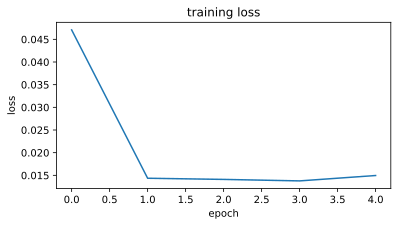

In [13]:
def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.xavier_uniform_(m.weight)

def new_get_net():
  net = nn.Sequential(
      nn.Linear(tau, 50),
      nn.ReLU(),
      nn.Linear(50, 10),
      nn.ReLU(),
      nn.Linear(10, 1)
  )
  net = net.apply(init_weights)
  return net

def train_draw(net, train_iter, loss, num_epochs, lr):
  trainer = torch.optim.Adam(net.parameters(), lr)
  losses = []
  for epoch in range(num_epochs):
    epoch_loss = 0
    for X, y in train_iter:
      trainer.zero_grad()
      l = loss(net(X), y)
      l.sum().backward()
      trainer.step()
      epoch_loss += l.mean().item()
    epoch_loss /= len(train_iter)
    losses.append(epoch_loss)
    print(f'epoch:{epoch + 1}, loss:{epoch_loss:f}')
  plt.plot(losses)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.title('training loss')
  plt.show()

net_1 = new_get_net()
loss = nn.MSELoss(reduction='none')

train_draw(net_1, train_iter, loss, 5, 0.01)

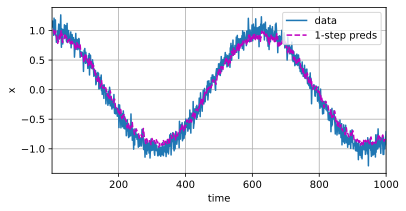

In [14]:
onestep_preds = net_1(features)
d2l.plot(
  [time, time[tau:]],
  [x.detach().numpy(), onestep_preds.detach().numpy()], 'time',
  'x', legend=['data', '1-step preds'], xlim=[1, 1000],
  figsize=(6, 3)
)

### 2、3、4


2. 一位投资者想要找到一种好的证券来购买。他查看过去的回报，以决定哪一种可能是表现良好的。这一策略可能会出什么问题呢？

- 该投资者仅采用过去的回报作为参考信息来预测未来的证券表现，属于外推法。
- 外推法在预测未来数据时，存在假设局限性
  - 数据**必须满足**其过去历史可以用来预测未来的趋势。如果假设不成立，那么预测结果很可能会不准确。
  - 外推法不能预测突发事件的发生，并且预测结果非常依赖**数据质量**。如果历史数据不准确，预测结果也会收到影响。
- 对于金融证券来说，决定证券回报的因素不仅仅包括过去的回报曲线，
  - 还包括政治事件、行业趋势和金融危机等**外部因素**，而这些因素往往是决定证券表现的重要因素。
  - 因此在使用外推法预测证券未来回报时，很难考虑到随时变化的市场环境以及突发的外部因素，从而带来产生巨大误差。

3. 时间是向前推进的因果模型在多大程度上适用于文本呢？
- 时间是向前推进的因果模型是一种基于时间序列和因果关系的模型，该模型假设未来的结果受过去因素和时间序列影响，并且**无法反过来**影响过去因素
- 在文本数据中，时间序列并非影响未来文本结果产生的唯一因素，并且某种程度上来讲，时序与文本内容的产生并无显著关联
- 因此采用时间前向推进的因果模型并不能很好的适用于文本场景。需要通过建立更加复杂的模型来考虑影响文本内容的多种因素

4. 举例说明什么时候可能需要隐变量自回归模型来捕捉数据的动力学模型
- 隐变量自回归模型是一种用于建模时间序列数据中的动态变化的**自回归模型**，该模型通过引入一些**隐变量**来捕捉数据的动态性质
- 动力学模型则是一种描述系统状态随时间变化而变化的数学模型，在该模型中，系统的状态可以用一组状态变量来表示，并且这些状态变量随着时间的推移而发生变化
- 在实际场景中，股票价格变化通常受时间序列和市场因素的影响，可通过隐变量自回归模型自回归的建模股票在时间上的依赖关系，并**通过隐变量来捕捉未观测到的市场信息**，最终建立起股票价格的动力学模型